###PRIMERA PARTE: ANALIZANDO LA BASE###

EJERCICIO 2:LIMPIEZA DE BASE DE DATOS

In [77]:
import pandas as pd

#Abrimos la base

df = pd.read_excel('./EPH_usu_1er_Trim_2022_xlsx/usu_individual_T122.xlsx')

INCISO a_: eliminamos todos los aglomerados que no correspondan a CABA (cód 32) o GBA (cód 33)

In [78]:
df_cortado = df.query("AGLOMERADO in (32, 33)") # la manera mas rapida y facil de hacerlo

print(len(df_cortado))

df_cortado.sample(10)

49706
6706


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
35075,TQRMNORTQHKMNRCDEIIAD00780026,2022,1,1,2,1,1,S,32,1844,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
4254,TQRMNOPVXHLMKOCDEIIAD00718601,2022,1,1,4,1,1,S,32,1402,...,NaN,4,24000.00,3,NaN,3,3.0,NaN,2,3084
4595,TQRMNOQUTHJMMPCDEIJAH00719186,2022,1,1,1,1,1,S,33,563,...,NaN,1,32000.00,5,NaN,5,5.0,NaN,5,799
40133,TQRMNOPVRHLKMSCDEIIAD00718402,2022,1,1,6,0,1,S,32,1941,...,NaN,4,14000.00,2,NaN,2,2.0,NaN,1,4504
18260,TQRMNORTWHJMMLCDEIIAD00718631,2022,1,1,1,1,1,S,32,1253,...,NaN,6,160000.00,10,NaN,10,10.0,NaN,9,1672
3417,TQRMNOUPVHLMQQCDEIJAH00719333,2022,1,1,2,1,1,S,33,4166,...,NaN,7,18571.43,3,NaN,2,2.0,NaN,3,7927
18953,TQRMNORTYHMMKMCDEIJAH00701071,2022,1,1,3,1,1,S,33,2932,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
34797,TQRMNOQTWHJKNLCDEIIAD00780025,2022,1,1,2,1,1,S,32,1763,...,NaN,6,47000.00,7,NaN,7,7.0,NaN,4,2746
35789,TQRMNOPXSHJMMNCDEIJAH00780747,2022,1,1,2,1,1,S,33,3246,...,NaN,1,5250.00,1,NaN,1,1.0,NaN,1,3580
1860,TQRMNOQWQHLLROCDEIJAH00780208,2022,1,1,3,1,1,S,33,3990,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


INCISO b_ : eliminamos obs que no tienen sentido

In [152]:
#Las variables PP08 son ingresos por la actividad principal por lo que si el indiv no es ocupado estas variables son missing, entonces si nos quedamos con las obs mayores o iguales a 0 estaríamos eliminando a todos los no ocupados.
#Eliminamos obs con valores de ingreso y edad negativos
df_cortado = df_cortado.query("CH06 >= 0")
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08D1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08D4']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08F1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08F2']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J2']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J3']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['IPCF']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['ITF']<0].index)

print(len(df_cortado))

5992


INCISO c_ : gráfico de barras composición por sexo

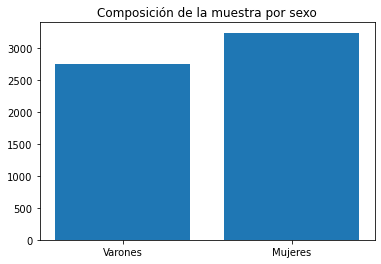

In [154]:
import matplotlib.pyplot as plt

varones = df_cortado.query("CH04 == 1")
mujeres = df_cortado.query("CH04 == 2")

plt.bar(['Varones', 'Mujeres'], [len(varones), len(mujeres)])
plt.title("Composición de la muestra por sexo")
plt.show()

INCISO d_ : correlaciones 

5992
1364


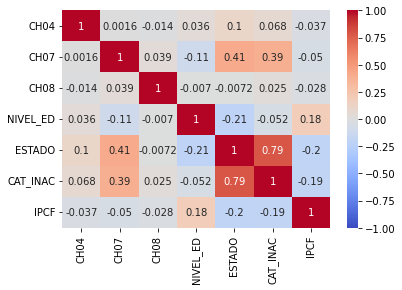

In [157]:
import seaborn as sns

df_corr=df_cortado[["CH04", "CH07","CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]]
sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


INCISO e_ : cantidad de Desocupados

In [160]:
from tabulate import tabulate

des=0
inac=0
ocup=0
for elem in df_cortado["ESTADO"]: #ESTADO=0(NO RESPONDE), ESTADO=1 (OCUPADO), ESTADO=2(DESOCUPADO), ESTADO=3(INACTIVO), ESTADO=4(MENOR DE 10)
    if elem==2:
        des=des+1
    elif elem==3:
        inac=inac+1
    elif elem==1:
        ocup=ocup+1


df_inc=df_cortado[["ESTADO", "IPCF"]]
mean=df_inc.groupby(by="ESTADO").mean()
mean=mean.drop(0) #Eliminamos ESTADO=0 que son los que no respondieron

table=pd.DataFrame(columns=["Desocupados","Inactivos","Ocupados", "Mean_IPCF_ocup","Mean_IPCF_desocup","Mean_IPCF_inac"])
table.loc[0]=[des,inac,ocup,round(mean.loc[1, "IPCF"]),round(mean.loc[2, "IPCF"]),round(mean.loc[3, "IPCF"])]

#Imprimos una tabla con datos solicitados.
print(tabulate(table,headers="keys"))

#Exportamos tabla
with open('mean_table.tex','w') as tf:
    tf.write(table.to_latex())



      Desocupados    Inactivos    Ocupados    Mean_IPCF_ocup    Mean_IPCF_desocup    Mean_IPCF_inac
--  -------------  -----------  ----------  ----------------  -------------------  ----------------
 0            232         2695        2324             39839                14758             22350


INCISO f_ : agregamos las variables adulto_equiv y ad_equiv_hogar:

Abrimos  y limpiamos la base de equivalencias

In [84]:
df_equiv = pd.read_excel('tabla_adulto_equiv.xlsx')

df_equiv.loc[1,"Edad"]=1


for i in range(0,18):
    df_equiv.loc[i,"Edad"]= i 

for i in range(18,30): #18-29 años 0.76/1.02
    df_equiv.loc[i]= [i,0.76,1.02] 

for i in range(30,46): #30-45 años 0.77/1
    df_equiv.loc[i]= [i,0.77,1] 

for i in range(46,61): #46-60 años 0.76/1
    df_equiv.loc[i]= [i,0.76,1] 

for i in range(61,76): #61-75 años 0.67/0.83
    df_equiv.loc[i]= [i,0.67,0.83]

for i in range(76,106): #18-29 años 0.63/0.74. La edad max en la EPH es 105 años. 
    df_equiv.loc[i]= [i,0.63,0.74] 

df_equiv = df_equiv.rename(columns={'Edad':'CH06'})
print(df_equiv)

      CH06  Mujeres  Varones
0        0     0.35     0.35
1        1     0.37     0.37
2        2     0.46     0.46
3        3     0.51     0.51
4        4     0.55     0.55
..     ...      ...      ...
101  101.0     0.63     0.74
102  102.0     0.63     0.74
103  103.0     0.63     0.74
104  104.0     0.63     0.74
105  105.0     0.63     0.74

[106 rows x 3 columns]


Añadimos la variable 'adulto_equiv' a la base de la EPH

In [109]:
df_merge=df_cortado.merge(df_equiv, on='CH06')

for i in range(len(df_merge)):
    if df_merge.loc[i,"CH04"]==1:
        df_merge.loc[i,"adulto_equiv"]=df_merge.loc[i,"Varones"]
    elif df_merge.loc[i,"CH04"]==2:
        df_merge.loc[i,"adulto_equiv"]=df_merge.loc[i,"Mujeres"]


df_merge.drop (["Varones","Mujeres"] , axis =1 , inplace = True)

#El data frame relevante ahora es df_merge


Creamos la variable 'ad_equiv_hogar' agrupando por CODUSO Y NRO_HOGAR

In [117]:
df_sum=df_merge.groupby(['CODUSU', 'NRO_HOGAR'])[['adulto_equiv']].agg('sum')
df_sum.reset_index( inplace = True )
df_sum = df_sum.rename(columns={'adulto_equiv':'ad_equiv_hogar'})

df_merge_1=df_merge.merge(df_sum, on=["CODUSU", "NRO_HOGAR"])
df_merge_1.sort_values(by="CODUSU")

#El data frame relevante ahora es df_merge_1


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar
4273,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,1,1,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,1.02,2.88
4275,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,3,0,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.64,2.88
4276,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,4,0,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.46,2.88
4274,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,2,1,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.76,2.88
5368,TQRMNOPPQHJMQLCDEIJAH00702455,2022,1,1,1,1,1,S,33,2054,...,55000.00,8,NaN,7,8.0,NaN,8,3275,0.67,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,6,0,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.60,5.64
4236,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,2,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,1.02,5.64
4237,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,1,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.77,5.64
4238,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,5,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.82,5.64


EJERCICIO 3: Cuantos no respondieron ingreso

In [162]:
#Contamos cuando no respondieron
no_resp=0
for elem in df_merge_1["ITF"]:
    if elem==0:
        no_resp=no_resp+1
print("No respondieron ingreso", no_resp, "personas", "de", len(df_merge_1))

#Guardamos las obs que respondieron en el df 'df_respondieron':
df_respondieron = df_merge_1.drop(df_merge_1[df_merge_1['ITF']<=0].index)
df_respondieron.reset_index(inplace=True, drop=True)

##Guardamos las obs que no respondieron en el df 'df_norespondieron':
df_norespondieron= df_merge_1.drop(df_merge_1[df_merge_1['ITF']>0].index) 
print(len(df_norespondieron)) #chequeamos que la cantidad de obs sea igual a no_resp



No respondieron ingreso 2250 personas de 5992
2250


EJERCICO 4: agregamos la variable 'ingreso_necesario' que establece la LP para cada individuo

In [165]:
df_respondieron["ingreso_necesario"]=df_respondieron["ad_equiv_hogar"]*(27197.64) #$27197.64 es la CBA

EJERCICIO 5: agregamos la variable 'Pobre' 

In [166]:
df_respondieron["Pobre"]=0

for i in range(len(df_respondieron)):
    if df_respondieron.loc[i,"ingreso_necesario"] < 27197.64 :
        df_respondieron.loc[i,"Pobre"]= 1

pobres=0
for elem in df_respondieron["Pobre"]:
    if elem==1:
        pobres=pobres+1

tasa_pobreza=pobres/len(df_respondieron)

print("La cantidad de pobres en la muestra que respondio es de:", pobres, "de", len(df_respondieron))
print("La tasa pobreza en la muestra es de los que respondieron es de:", round(tasa_pobreza*100,2), "%")





La cantidad de pobres en la muestra que respondio es de: 278 de 3742
La tasa pobreza en la muestra es de los que respondieron es de: 7.43 %
